# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Farkhan Adhitama
- Email: mfarkhan62@gmail.com
- Id Dicoding: farkhan_adhit

## Persiapan

### Menyiapkan library yang dibutuhkan

Import library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
# import logistic regression, random forest, decision tree, gradient boosting and SVM
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

### Menyiapkan data yang akan diguankan

### Load Data Dari Github

In [5]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
df = pd.read_csv(url, sep=";")
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

### Cek Struktur Data

In [6]:
# Lihat data dan tipenya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dari data diatas, tipe data yang digunakan sudah benar, sehingga tidak perlu mengubah ke tipe data lain.

### Cek Missing Value

In [7]:
# Cek missing value pada dataset
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


### Cek Data Duplicated

In [8]:
# cek data duplikat
print(f"Jumlah Data Duplikat : {df.duplicated().sum()}")

Jumlah Data Duplikat : 0


### Cek Statistik Data

In [9]:
# cek statistik dataset dari kolom 1-18
df.iloc[:, 0:17].describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# cek statistik dataset dari kolom 19-36
df.iloc[:, 18:36].describe()

,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


**Insight:**  
- Pada kolom Marital_status rata-rata 1.18 menunjukkan mayoritas siswa belum menikah.
- Kolom Applicatoin_order Menunjukkan rata-rata siswa mendaftar pada pilihan ke-2
- Kolom Daytime_evening_attendance mampir semua siswa mengikuti kelas siang, rata-rata mendekati 1 menunjukkan dominasi.
- Kolom Admission_grade, rata-rata nilai masuk cukup tinggi (126 dari 200), menunjukkan sebagian besar siswa punya performa akademik yang cukup baik saat mendaftar.
- Sekitar 54.8% siswa adalah displaced students, artinya mereka tinggal jauh dari rumah untuk kuliah.
- Kolom educational special needs hanya sekitar 1.15% siswa memiliki kebutuhan khusus dalam pendidikan.
- Debtor, sekitar 11.4% siswa memiliki utang atau tunggakan pembayaran. Ini penting untuk ditinjau dalam analisis keberlanjutan studi.
- Tutition fees uptodate, Sebanyak 88% siswa membayar biaya kuliah tepat waktu. Ini menunjukkan stabilitas finansial sebagian besar siswa.
- Gender, mayoritas siswa asalah prempuan sekitar 64,8 persen
- Sekitar 24.8% siswa menerima beasiswa. Ini cukup signifikan sebagai indikator dukungan keuangan.
- Usia rata-rata siswa saat masuk kuliah adalah 23 tahun
- Kolom International, hanya sekitar 2.5% siswa adalah siswa internasional.


### Kelompokkan Data

Kolom pada data akan dikelompookan berdasarkan kemiripannya, Hal ini dilakukan untuk mempermudah analisis dan visualisasi data. Kolom yang dikelompokkan adalah sebagai berikut:

In [11]:
# Fitur background siswa
background_cols = np.intersect1d(
    df.columns,
    [
        "Gender",
        "Age_at_enrollment",
        "Marital_status",
        "Nacionality",
        "International",
    ],
)

# Background keluarga
family_background_cols = np.intersect1d(
    df.columns,
    [
        "Mothers_qualification",
        "Fathers_qualification",
        "Mothers_occupation",
        "Fathers_occupation",
    ],
)

# Pendidikan Sebelumnya
pre_education_cols = np.intersect1d(
    df.columns,
    [
        "Previous_qualification",
        "Previous_qualification_grade",
        "Application_mode",
        "Application_order",
        "Admission_grade",
        "Displaced",
        "Educational_special_needs",
    ],
)

# Kondisi Keuangan dan Beasiswa
financial_cols = np.intersect1d(
    df.columns,
    [
        "Scholarship_holder",
        "Debtor",
        "Tuition_fees_up_to_date",
    ],
)

# Informasi akademik
academic_info_cols = np.intersect1d(
    df.columns,
    [
        "Course",
        "Daytime_evening_attendance",
    ],
)

# Performa akademik
academic_performance_cols = np.intersect1d(
    df.columns,
    [
        "Curricular_units_1st_sem_credited",
        "Curricular_units_1st_sem_enrolled",
        "Curricular_units_1st_sem_evaluations",
        "Curricular_units_1st_sem_approved",
        "Curricular_units_1st_sem_grade",
        "Curricular_units_1st_sem_without_evaluations",
        "Curricular_units_2nd_sem_credited",
        "Curricular_units_2nd_sem_enrolled",
        "Curricular_units_2nd_sem_evaluations",
        "Curricular_units_2nd_sem_approved",
        "Curricular_units_2nd_sem_grade",
        "Curricular_units_2nd_sem_without_evaluations",
    ],
)

# Faktor ekonomi
economic_cols = np.intersect1d(
    df.columns,
    [
        "Unemployment_rate",
        "Inflation_rate",
        "GDP",
    ],
)

# Kolom Target
target_col = ["Status"]
df_target = df[target_col]

#### Latar Belakang Siswa

In [12]:
df_background = df[background_cols]
df_background.head()

,Age_at_enrollment,Gender,International,Marital_status,Nacionality
0,20,1,0,1,1
1,19,1,0,1,1
2,19,1,0,1,1
3,20,0,0,1,1
4,45,0,0,2,1


Gabungkan data background siswa dengan target

In [13]:
# Gabungkan data background siswa dengan data target
df_background_target = pd.concat([df_background, df_target], axis=1)
# lihat data background siswa dan target
df_background_target.head()

,Age_at_enrollment,Gender,International,Marital_status,Nacionality,Status
0,20,1,0,1,1,Dropout
1,19,1,0,1,1,Graduate
2,19,1,0,1,1,Dropout
3,20,0,0,1,1,Graduate
4,45,0,0,2,1,Graduate


Melihat informasi tipe data pada df background

In [14]:
df_background_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age_at_enrollment  4424 non-null   int64 
 1   Gender             4424 non-null   int64 
 2   International      4424 non-null   int64 
 3   Marital_status     4424 non-null   int64 
 4   Nacionality        4424 non-null   int64 
 5   Status             4424 non-null   object
dtypes: int64(5), object(1)
memory usage: 207.5+ KB


Lakukan mapping dari data numerik ke kategorikal agar lebih mudah dipahami

In [15]:
# Mapping data background siswa
# Gender: 1 – male, 0 – female
df_background_target["Gender"] = df_background_target["Gender"].map({1: "Male", 0: "Female"})

# Marital_status: 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated
marital_status_map = {
    1: "Single",
    2: "Married",
    3: "Widower",
    4: "Divorced",
    5: "Facto Union",
    6: "Legally Separated",
}
df_background_target["Marital_status"] = df_background_target["Marital_status"].map(
    marital_status_map
)

# Nacionality
nacionality_map = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldovan",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian",
}
df_background_target["Nacionality"] = (
    df_background_target["Nacionality"].map(nacionality_map).fillna("Other")
)

# International: 1 – yes 0 – no
df_background_target["International"] = df_background_target["International"].map({1: "Yes", 0: "No"})

Boxplot age_at_enrollment dengan status

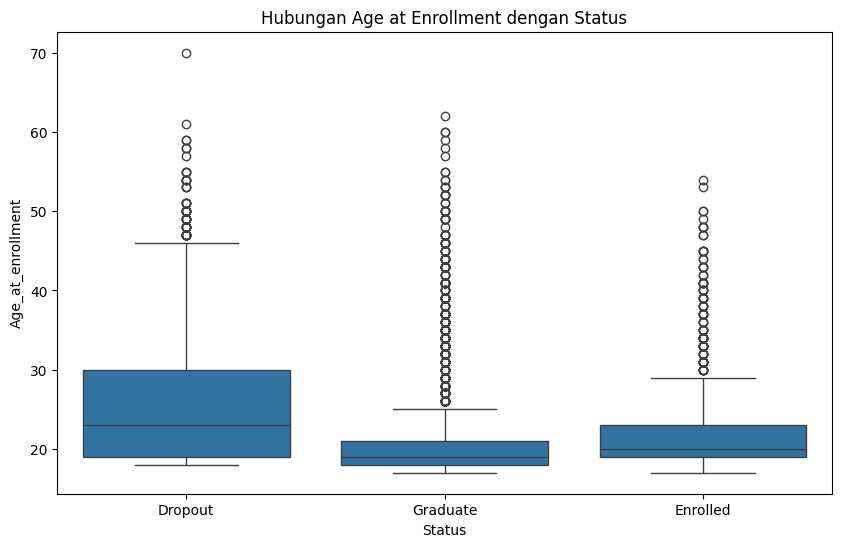

In [16]:
# Boxplot age_at_enrollment dengan status
plt.figure(figsize=(10, 6))
sns.boxplot(x="Status", y="Age_at_enrollment", data=df_background_target)
plt.title("Hubungan Age at Enrollment dengan Status")
plt.show()

Dari boxplot diatas, dapat dilihat bahwa siswa yang dropout ada yang mendaftar saat umur mereka lebih dari 25 tahun. Usia yang semakin tua mungkin membuat siswa kurang beradaptasi dengan lingkungan institut tersebut.

Hubungan gender internnasional dan marital dengan status siswa

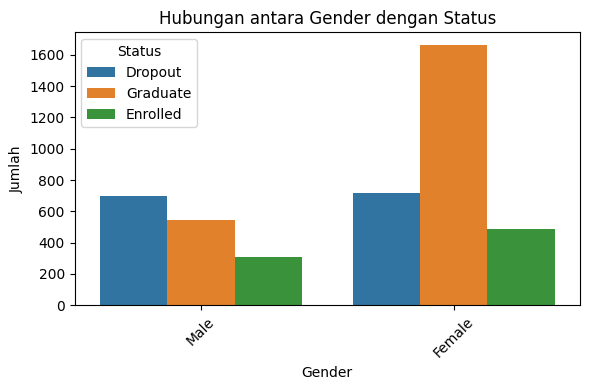

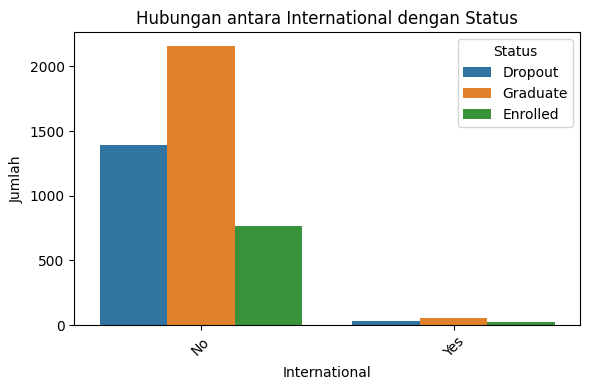

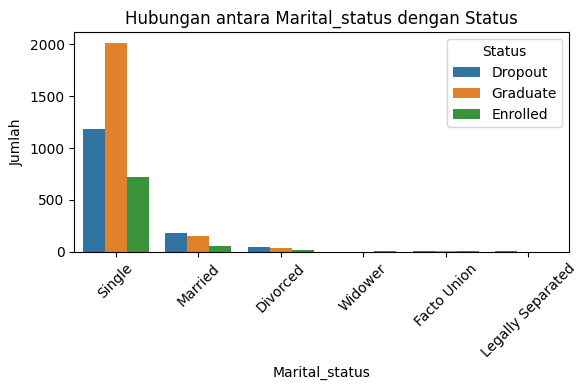

In [17]:
# Hubungan gender, international, marital status dengan status
categorical_cols = [
    "Gender",
    "International",
    "Marital_status",
]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_background_target, x=col, hue="Status")
    plt.title(f"Hubungan antara {col} dengan Status")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.legend(title="Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Berdasarkan kolom gender, perempuan lebih banyak lulus dibandingkan yang drop out, sedangkan laki laki lebih banyak yang drop out dibandingkan lulus. Hal ini menunjukkan bahwa perempuan lebih mampu beradaptasi dengan lingkungan institut tersebut dibandingkan laki-laki. Pada marital status, siswa yang single memiliki jumlah lulus yang lebih banyak daripada dropout.

Periksa negara masing masing siswa

In [18]:
# HItung status pada masing-masing negara atau nacionality (pivot table)
df_nacionality = (
    df_background_target.groupby("Nacionality")["Status"]
    .value_counts()
)
print(df_nacionality)

Nacionality   Status  
Angolan       Dropout        1
              Enrolled       1
Brazilian     Graduate      18
              Dropout       14
              Enrolled       6
Cape Verdean  Graduate       8
              Dropout        4
              Enrolled       1
Colombian     Dropout        1
Cuban         Enrolled       1
Dutch         Graduate       1
English       Graduate       1
German        Graduate       2
Guinean       Graduate       4
              Dropout        1
Italian       Graduate       3
Lithuanian    Dropout        1
Mexican       Dropout        1
              Graduate       1
Moldovan      Dropout        2
              Enrolled       1
Mozambican    Enrolled       1
              Graduate       1
Portuguese    Graduate    2155
              Dropout     1389
              Enrolled     770
Romanian      Enrolled       1
              Graduate       1
Russian       Dropout        1
              Enrolled       1
Santomean     Graduate       8
              En

Kebanyakan siswa berasal dari protugis dengan kelulusan mencapai 2155 siswa.

#### Latar Belakang Keluarga

In [19]:
df_family_background = df[family_background_cols]
df_family_background.head()

,Fathers_occupation,Fathers_qualification,Mothers_occupation,Mothers_qualification
0,9,12,5,19
1,3,3,3,1
2,9,37,9,37
3,3,37,5,38
4,9,38,9,37


Gabungkan data background keluarga dengan target

In [20]:
# Gabungkan data background keluarga dengan data target
df_family_background_target = pd.concat([df_family_background, df_target], axis=1)
# lihat data background keluarga dan target
df_family_background_target.head()

,Fathers_occupation,Fathers_qualification,Mothers_occupation,Mothers_qualification,Status
0,9,12,5,19,Dropout
1,3,3,3,1,Graduate
2,9,37,9,37,Dropout
3,3,37,5,38,Graduate
4,9,38,9,37,Graduate


Hubungan family background dengan status

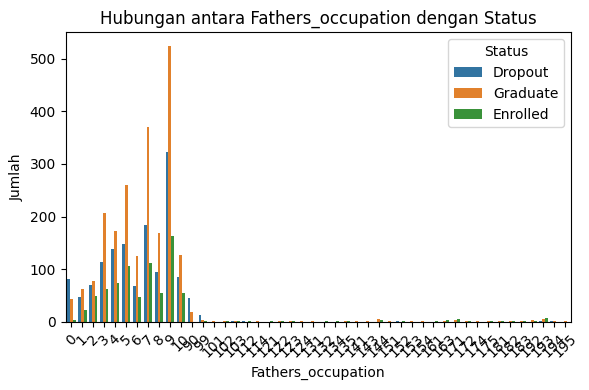

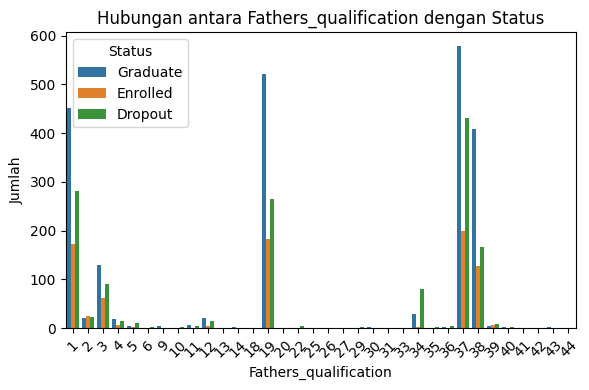

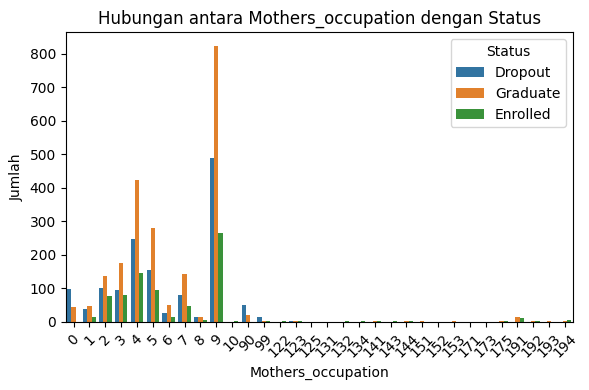

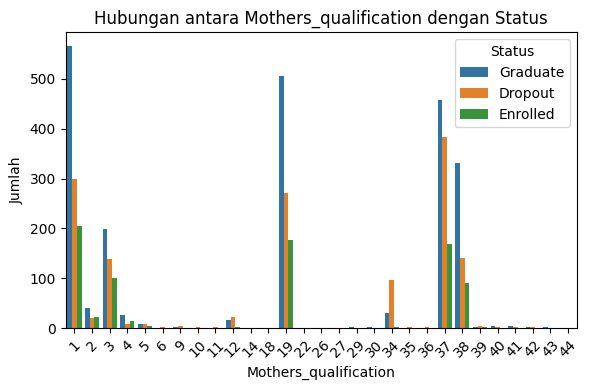

In [21]:
# Hubungan family background dengan status

for col in df_family_background_target.drop(["Status"], axis=1).columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_family_background_target, x=col, hue="Status")
    plt.title(f"Hubungan antara {col} dengan Status")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.legend(title="Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Fitur ini tidak terlalu berpengaruh terhadap kelanjutan studi siswa, tetapi bisa memberikan gambaran tentang latar belakang siswa. Fitur ini juga bisa membantu dalam analisis lebih lanjut.

#### Pendidikan Sebelumnya

Buat dataframe pendidikan sebelumnya

In [22]:
df_pre_education = df[pre_education_cols]
df_pre_education.head()

,Admission_grade,Application_mode,Application_order,Displaced,Educational_special_needs,Previous_qualification,Previous_qualification_grade
0,127.3,17,5,1,0,1,122.0
1,142.5,15,1,1,0,1,160.0
2,124.8,1,5,1,0,1,122.0
3,119.6,17,2,1,0,1,122.0
4,141.5,39,1,0,0,1,100.0


Hubungan pre education dengan status

In [ ]:
# Hubungan pre education dengan status
df_pre_education_target = pd.concat([df_pre_education, df_target], axis=1)
# lihat data background keluarga dan target
df_pre_education_target.head()

,Admission_grade,Application_mode,Application_order,Displaced,Educational_special_needs,Previous_qualification,Previous_qualification_grade,Status
0,127.3,17,5,1,0,1,122.0,Dropout
1,142.5,15,1,1,0,1,160.0,Graduate
2,124.8,1,5,1,0,1,122.0,Dropout
3,119.6,17,2,1,0,1,122.0,Graduate
4,141.5,39,1,0,0,1,100.0,Graduate


Plot boxplot untuk masing-masing kolom kontinu

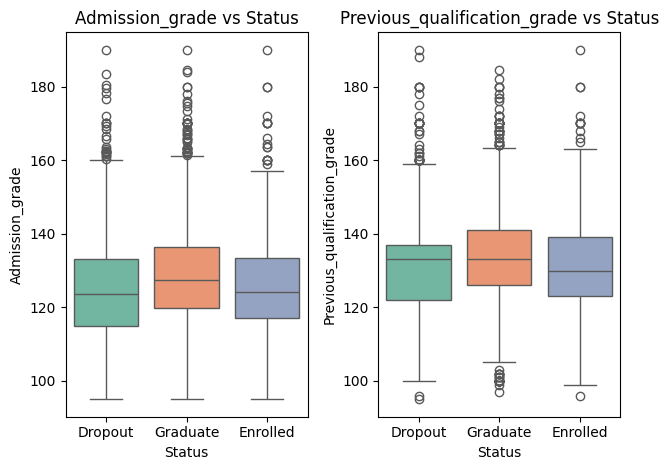

In [24]:
# Kolom numerik kontinu
numerical_cols = ["Admission_grade", "Previous_qualification_grade"]

# Plot boxplot untuk masing-masing kolom
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data=df_pre_education_target, x="Status", y=col, palette="Set2")
    plt.title(f"{col} vs Status")
    plt.xlabel("Status")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Berdsarkan admiison grade dan previous qualificatoin grade, siswa yang memiliki nilai tinggi pada admission grade dan previous qualification grade lebih banyak lulus dibandingkan yang drop out. Hal ini menunjukkan bahwa siswa yang memiliki nilai tinggi lebih mampu beradaptasi dengan lingkungan institut tersebut dibandingkan siswa yang memiliki nilai rendah.

Plot  untuk masing-masing kolom kategorikal pada data pendidikan sebelumnya

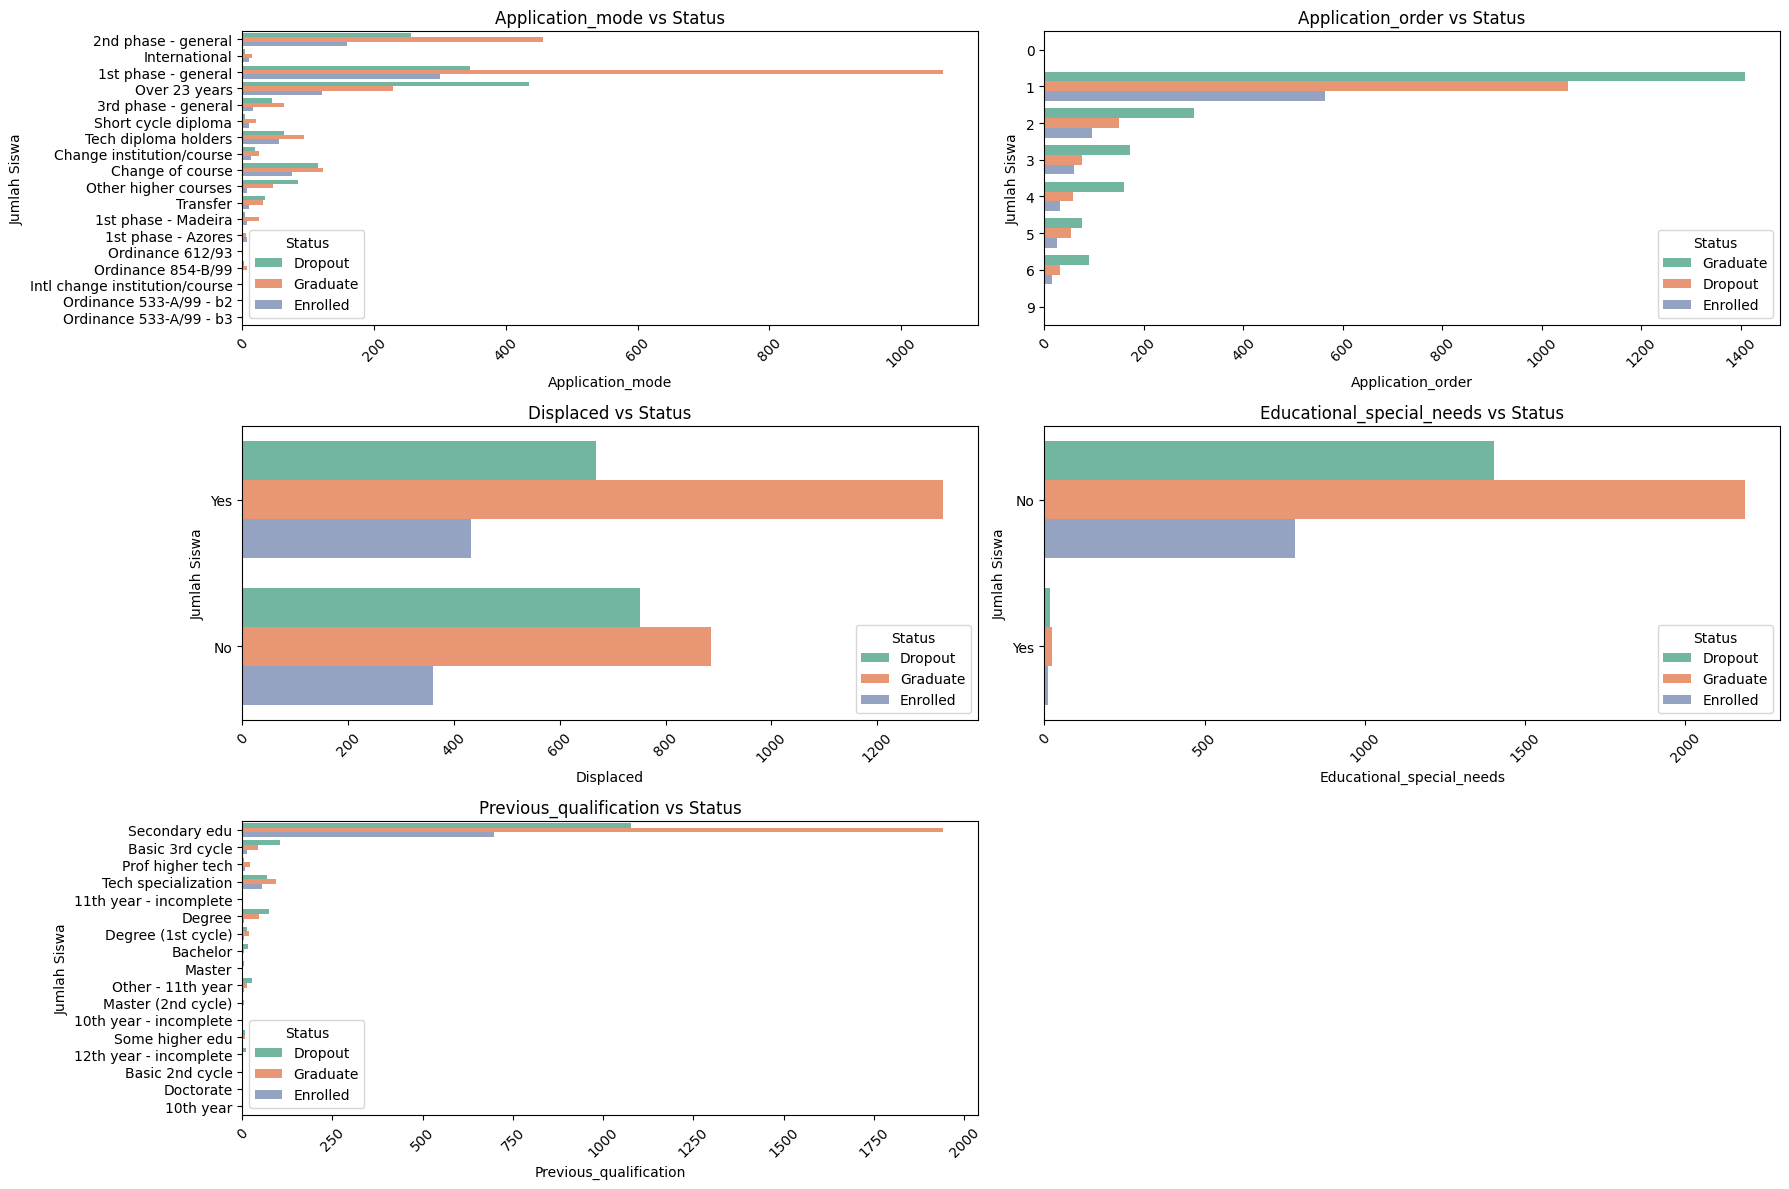

In [25]:
# Kolom kategori
categorical_cols = [
    "Application_mode",
    "Application_order",
    "Displaced",
    "Educational_special_needs",
    "Previous_qualification"
]

# Mapping Application_mode
application_mode_map = {
    1: "1st phase - general",
    2: "Ordinance 612/93",
    5: "1st phase - Azores",
    7: "Other higher courses",
    10: "Ordinance 854-B/99",
    15: "International",
    16: "1st phase - Madeira",
    17: "2nd phase - general",
    18: "3rd phase - general",
    26: "Ordinance 533-A/99 - b2",
    27: "Ordinance 533-A/99 - b3",
    39: "Over 23 years",
    42: "Transfer",
    43: "Change of course",
    44: "Tech diploma holders",
    51: "Change institution/course",
    53: "Short cycle diploma",
    57: "Intl change institution/course",
}

# Mapping Displaced
displaced_map = {0: "No", 1: "Yes"}

# Mapping Educational_special_needs
special_needs_map = {0: "No", 1: "Yes"}

# Mapping Previous_qualification
prev_qual_map = {
    1: "Secondary edu",
    2: "Bachelor",
    3: "Degree",
    4: "Master",
    5: "Doctorate",
    6: "Some higher edu",
    9: "12th year - incomplete",
    10: "11th year - incomplete",
    12: "Other - 11th year",
    14: "10th year",
    15: "10th year - incomplete",
    19: "Basic 3rd cycle",
    38: "Basic 2nd cycle",
    39: "Tech specialization",
    40: "Degree (1st cycle)",
    42: "Prof higher tech",
    43: "Master (2nd cycle)",
}

# Terapkan mapping
df_pre_education_target["Application_mode"] = df_pre_education_target["Application_mode"].map(
    application_mode_map
)
df_pre_education_target["Displaced"] = df_pre_education_target["Displaced"].map(displaced_map)
df_pre_education_target["Educational_special_needs"] = df_pre_education_target[
    "Educational_special_needs"
].map(special_needs_map)
df_pre_education_target["Previous_qualification"] = df_pre_education_target[
    "Previous_qualification"
].map(prev_qual_map)


# Plot countplot untuk masing-masing kolom
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df_pre_education_target, y=col, hue="Status", palette="Set2")
    plt.title(f"{col} vs Status")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Jumlah Siswa")

plt.tight_layout()
plt.show()

Beerdasarkan grafik di atas, kita kurang bisa melihat informasi yang memengaruhi kelulusan secara langsung.

#### Financial Background

Buat dataframe financial background, gabung dengan targetnya

In [26]:
# Lihat data kondisi keuengan siswa
df_financial_cols = df[financial_cols]
df_financial_cols_target = pd.concat([df_financial_cols, df_target], axis=1)
df_financial_cols_target.head()

,Debtor,Scholarship_holder,Tuition_fees_up_to_date,Status
0,0,0,1,Dropout
1,0,0,0,Graduate
2,0,0,0,Dropout
3,0,0,1,Graduate
4,0,0,1,Graduate


Buat visualisasi data hubungan fitur dengan target status

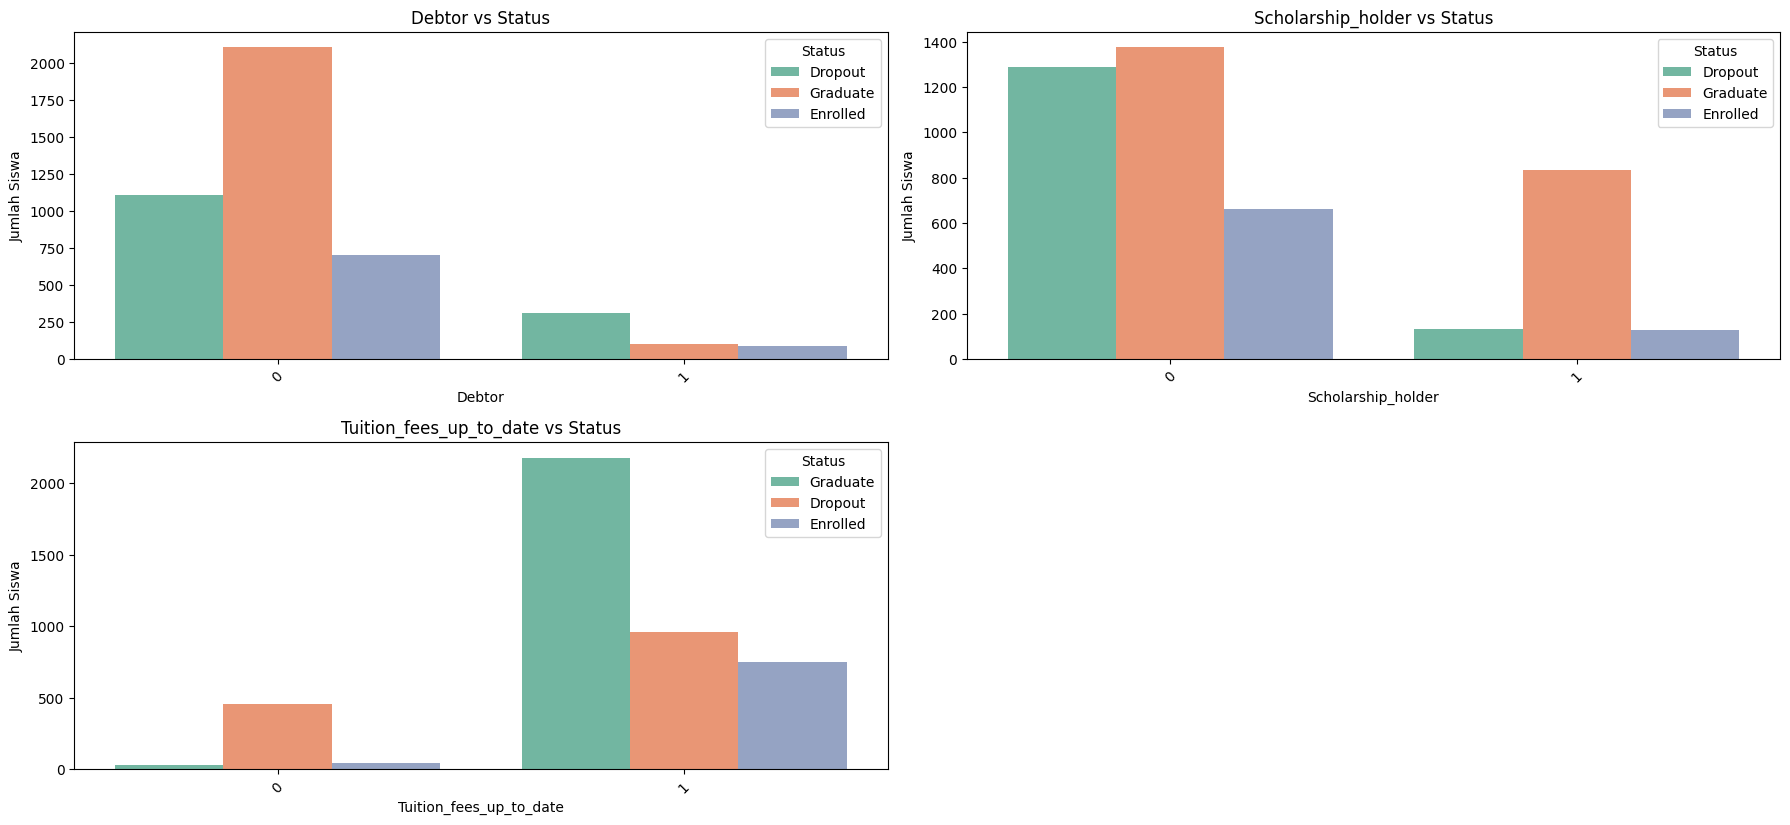

In [27]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(df_financial_cols_target.drop(["Status"], axis=1).columns):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df_financial_cols_target, x=col, hue="Status", palette="Set2")
    plt.title(f"{col} vs Status")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Jumlah Siswa")

plt.tight_layout()
plt.show()

Beerdasarkan grafik finansial di atas, siswa yang memiliki utang lebih banyak yang DO dari pada yang lulus, seddangkan yang tidak memiliki utang lebih banyak yang lulus diabaindigkan yang DO. Hal ini menunjukkan bahwa utang memengaruhi keputusan siswa untuk lulus. Lalu siswa yang memiliki beasiswa jarang yang DO, mayoritas lulus, sedangkan yang tidak memiliki beasiswa hampir sama antara yang lulus dan tidak. Kemudian pada kolom tuition up to date, siswa yang selalu membayar cenderung untuk lulus, sedangkan yang tidak membayar atau tidak kuat membayar akan keluar dari Institut tersebut.

#### Academic Info

Buat dataframe untuk academic info siswa

In [28]:
df_academic_info = df[academic_info_cols]
df_academic_info_target = pd.concat([df_academic_info, df_target], axis=1)
df_academic_info_target.head()

,Course,Daytime_evening_attendance,Status
0,171,1,Dropout
1,9254,1,Graduate
2,9070,1,Dropout
3,9773,1,Graduate
4,8014,0,Graduate


Lakukan mapping pada fitur numerik agar lebih mudah dipahami

In [29]:
# Mapping Course
course_map = {
    33: "Biofuel Tech",
    171: "Animation & Multimedia",
    8014: "Social Service (evening)",
    9003: "Agronomy",
    9070: "Comm Design",
    9085: "Vet Nursing",
    9119: "Informatics Eng",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Marketing Mgmt",
    9773: "Journalism",
    9853: "Basic Education",
    9991: "Management (evening)",
}

# Mapping Daytime_evening_attendance
attendance_map = {1: "Daytime", 0: "Evening"}

# Terapkan mapping
df_academic_info_target["Course"] = df_academic_info_target["Course"].map(course_map)
df_academic_info_target["Daytime_evening_attendance"] = df_academic_info_target[
    "Daytime_evening_attendance"
].map(attendance_map)

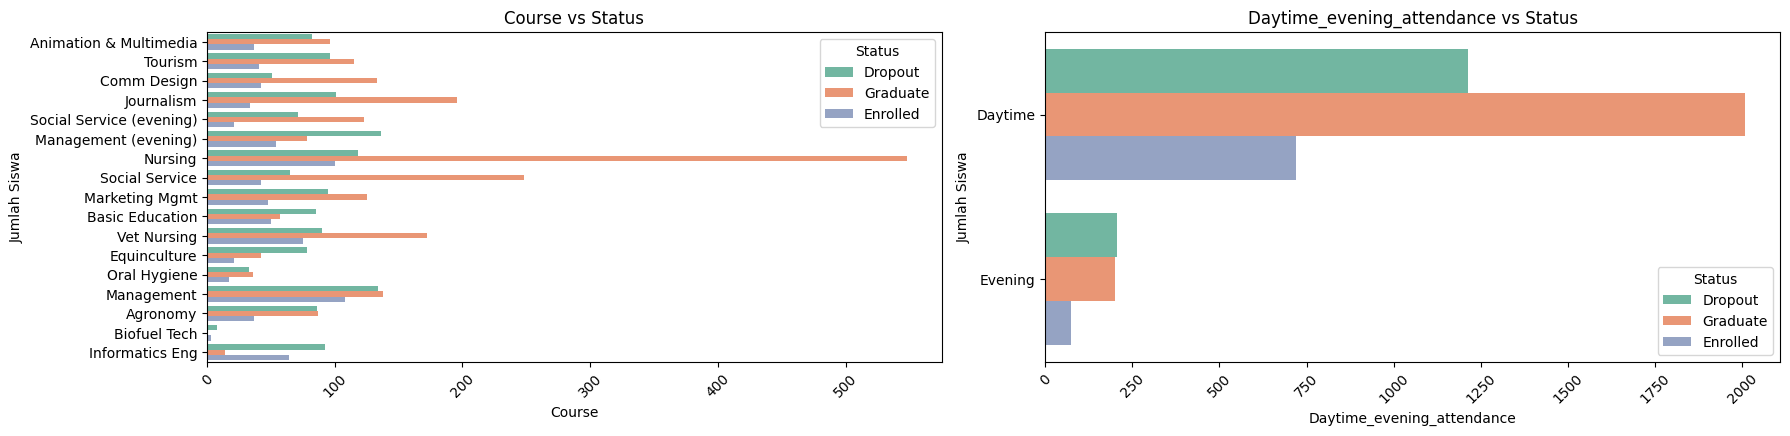

In [30]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(df_academic_info_target.drop(["Status"], axis=1).columns):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df_academic_info_target, y=col, hue="Status", palette="Set2")
    plt.title(f"{col} vs Status")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Jumlah Siswa")

plt.tight_layout()
plt.show()

Siswa yang menghardiri kelas siang lebih banyak yang lulus daripada DO, sedangkan pada kelas malam antara siswa yang lulus dan DO hampir sama.

#### Academic Performance

Buat datraframe untuk performa akademik, lalu tampilkan tabel nilainya

In [31]:
df_academic_performance = df[academic_performance_cols]
df_academic_performance_target = pd.concat(
    [df_academic_performance, df_target], axis=1
)
df_academic_performance_target.head()

,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,Dropout
1,6,0,6,6,14.000000,0,6,0,6,6,13.666667,0,Graduate
2,0,0,6,0,0.000000,0,0,0,6,0,0.000000,0,Dropout
3,6,0,6,8,13.428571,0,5,0,6,10,12.400000,0,Graduate
4,5,0,6,9,12.333333,0,6,0,6,6,13.000000,0,Graduate


#### Ekonomi

Buat dataframe ekonomi siswa lalu gabung dengan data targetnya

In [32]:
df_economic = df[economic_cols]
# gabungkan data ekonomi dengan data target
df_economic_target = pd.concat([df_economic, df_target], axis=1)
df_economic_target.head()

,GDP,Inflation_rate,Unemployment_rate,Status
0,1.74,1.4,10.8,Dropout
1,0.79,-0.3,13.9,Graduate
2,1.74,1.4,10.8,Dropout
3,-3.12,-0.8,9.4,Graduate
4,0.79,-0.3,13.9,Graduate


Buat visualisasi data untuk setiap fitur ekonomi

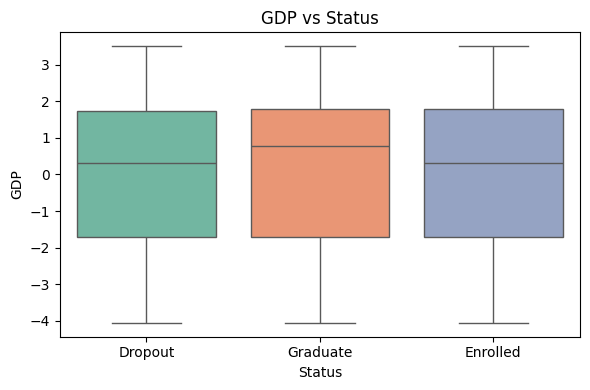

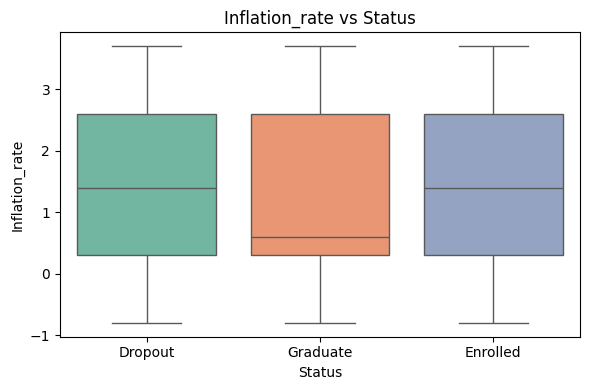

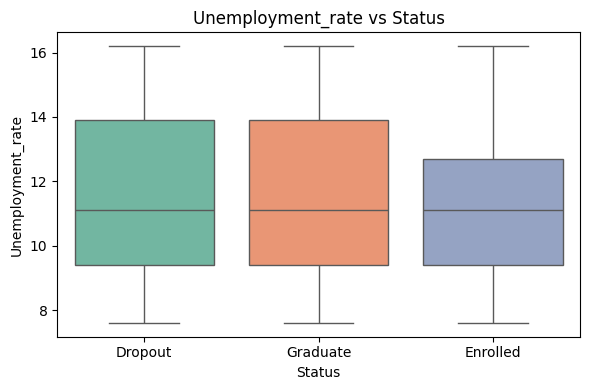

In [33]:
# Buat visualisasi untuk setiap fitur ekonomi
economic_cols = ["GDP", "Inflation_rate", "Unemployment_rate"]

for col in economic_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_economic_target, x="Status", y=col, palette="Set2")
    plt.title(f"{col} vs Status")
    plt.xlabel("Status")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Kurang dapat diambil info yang berguna dari visualisasi di atas.

### Feature Correlation

Buat data baru terlebih dahulu

In [34]:
df_new = df.copy()
# Mapping status ke numerik
status_mapping = {"Dropout": 0, "Enrolled": 1, "Graduate": 2}
df_new["Status"] = df["Status"].map(status_mapping)

Melihat korelasi antar fitur pada dataset siswa

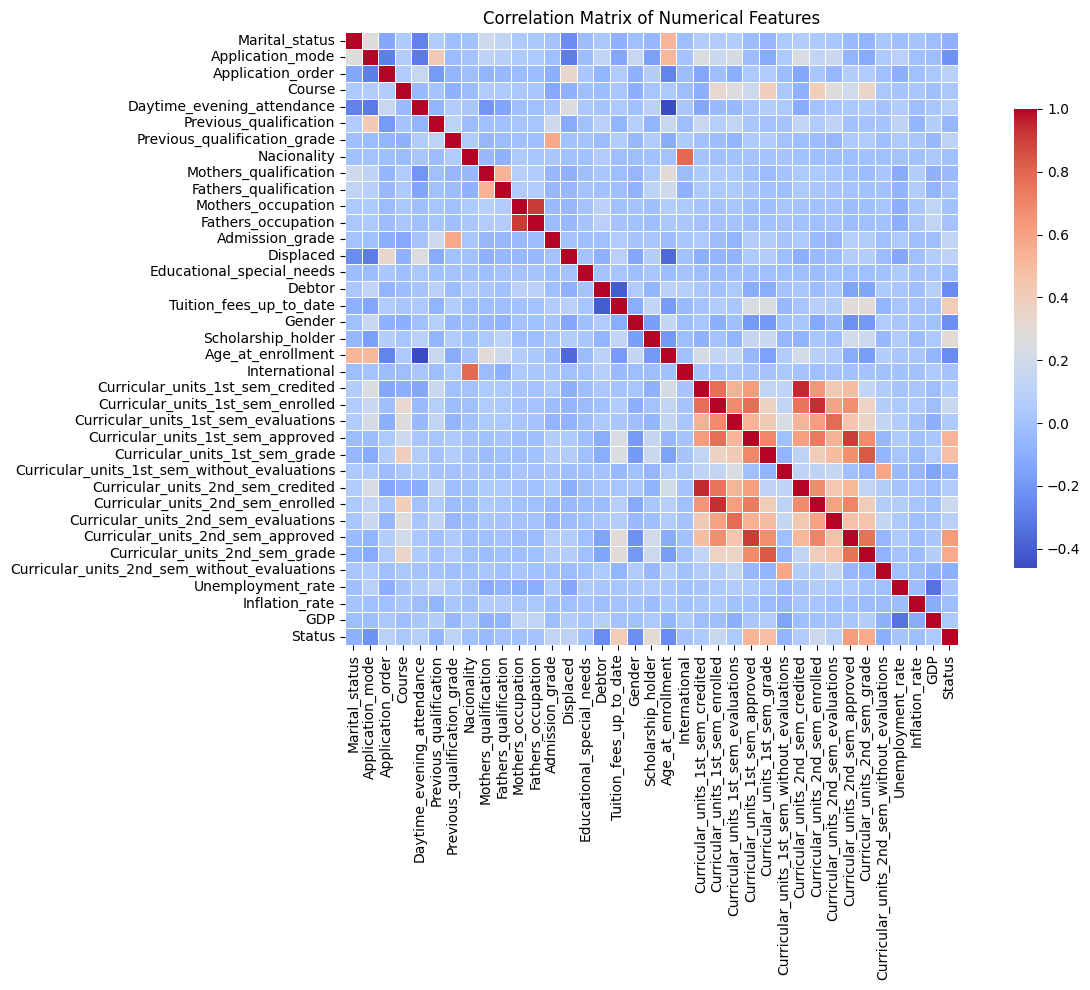

In [35]:

# matriks korlasi pada dataframe df dengan kolom status hanya pada kolom numerik
df_numeric = df_new.select_dtypes(include=["int64", "float64"])

# Hitung korelasi Pearson
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

Hitung korelasi dengan target 'Status'

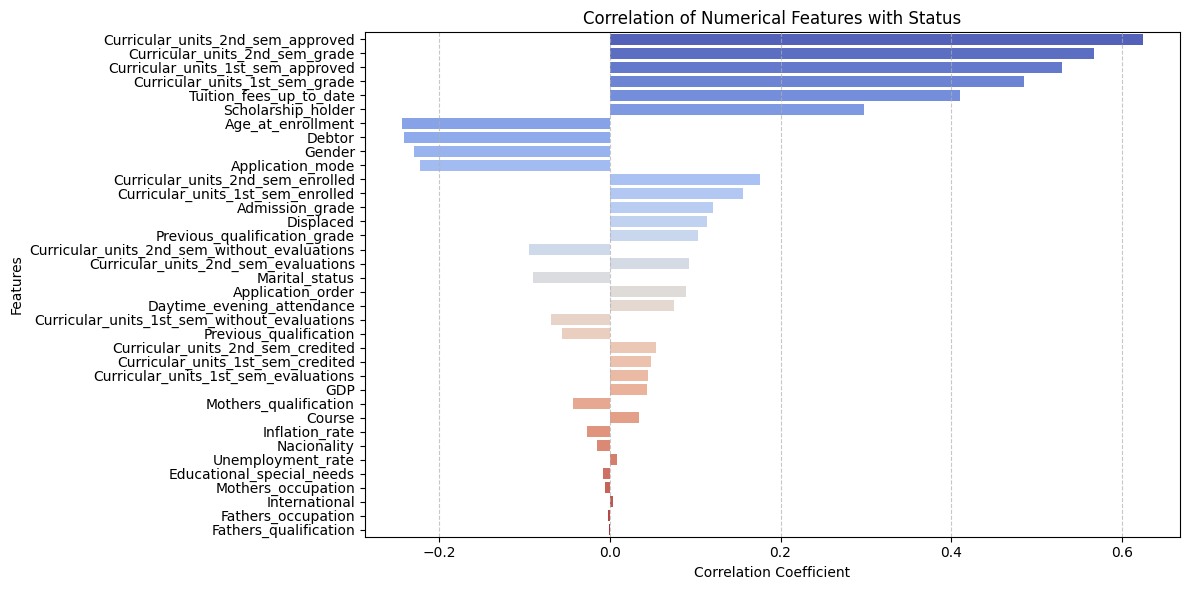

In [36]:
# Hitung korelasi dengan target 'Status'
target_corr = df_numeric.corr()["Status"].drop(
    "Status"
)  
target_corr = target_corr.sort_values(key=abs, ascending=False)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Correlation of Numerical Features with Status")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

### Pemilihan Fitur

Lakukan pemilihan fitur berdasarkan nilai korelasi fitur dengan targetnya pada visualisasi sebelumnya

In [37]:
# Pilih fitur yang memiliki korelasi cukup tinggi dengan target
selected_features = [
    "Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_grade",
    "Curricular_units_1st_sem_approved",
    "Curricular_units_1st_sem_grade",
    "Tuition_fees_up_to_date",
    "Scholarship_holder",
    "Age_at_enrollment",
    "Debtor",
    "Admission_grade",  
    "Application_mode",  
    "Displaced",  
    "Previous_qualification_grade",  
]

df_selected = df[selected_features + ["Status"]]
df_selected

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Admission_grade,Application_mode,Displaced,Previous_qualification_grade,Status
0,0,0.000000,0,0.000000,1,0,20,0,127.3,17,1,122.0,Dropout
1,6,13.666667,6,14.000000,0,0,19,0,142.5,15,1,160.0,Graduate
2,0,0.000000,0,0.000000,0,0,19,0,124.8,1,1,122.0,Dropout
3,5,12.400000,6,13.428571,1,0,20,0,119.6,17,1,122.0,Graduate
4,6,13.000000,5,12.333333,1,0,45,0,141.5,39,0,100.0,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,5,12.666667,5,13.600000,1,0,19,0,122.2,1,0,125.0,Graduate
4420,2,11.000000,6,12.000000,0,0,18,1,119.0,1,1,120.0,Dropout
4421,1,13.500000,7,14.912500,1,1,30,0,149.5,1,1,154.0,Dropout
4422,5,12.000000,5,13.800000,1,1,20,0,153.8,1,1,180.0,Graduate


Hapus data duplikat dan missing value jika ada

In [38]:
#  Hapus data duplikat dan missing value
df_selected.dropna(inplace=True)
df_selected.drop_duplicates(inplace=True)
print(df_selected.isna().sum())
print("Jumlah data duplikat :", df_selected.duplicated().sum())

Curricular_units_2nd_sem_approved    0
Curricular_units_2nd_sem_grade       0
Curricular_units_1st_sem_approved    0
Curricular_units_1st_sem_grade       0
Tuition_fees_up_to_date              0
Scholarship_holder                   0
Age_at_enrollment                    0
Debtor                               0
Admission_grade                      0
Application_mode                     0
Displaced                            0
Previous_qualification_grade         0
Status                               0
dtype: int64
Jumlah data duplikat : 0


### Data Splitting

Lakukan data splitting dengan rasio data pelatihan 80 persen dan data uji 20 persen

In [39]:
X = df_selected.drop("Status", axis=1)
y = df_selected["Status"]
# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Tampilkan jumlah data dan persentase tiap kelas target

In [40]:
print("Train set:", X_train.shape)
print("Test set :", X_test.shape)
print("Train class distribution:", y_train.value_counts(normalize=True))
print("Test class distribution :", y_test.value_counts(normalize=True))

Train set: (3535, 12)
Test set : (884, 12)
Train class distribution: Status
Graduate    0.499859
Dropout     0.320509
Enrolled    0.179632
Name: proportion, dtype: float64
Test class distribution : Status
Graduate    0.500000
Dropout     0.320136
Enrolled    0.179864
Name: proportion, dtype: float64


Visualisasi data training

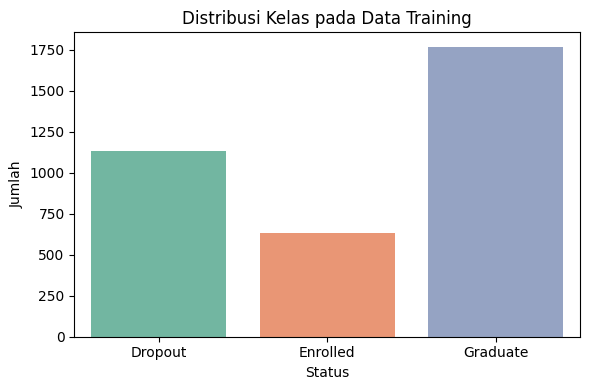

In [41]:
# visualisasi data training
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette="Set2")
plt.title("Distribusi Kelas pada Data Training")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

Visualisasi data testgin

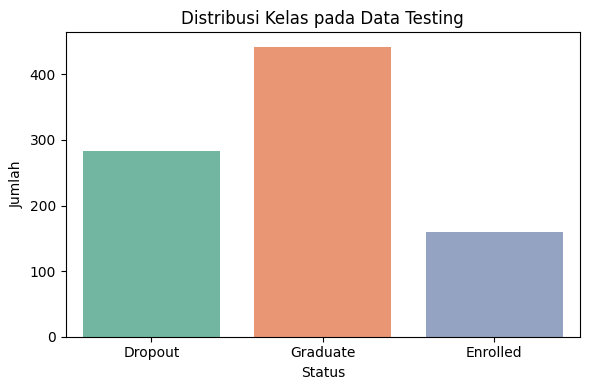

In [42]:
# visualisasi data testing
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, palette="Set2")
plt.title("Distribusi Kelas pada Data Testing")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

### Scaling

Lakukan scaling pada data training menggunakan standar scaler

In [43]:
# Lakukan standarisasi data pada data training 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Lihat data training setelah distandarisasi
df_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
df_scaled["Status"] = y_train.reset_index(drop=True)
df_scaled.head()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Admission_grade,Application_mode,Displaced,Previous_qualification_grade,Status
0,-1.466835,-1.950789,-1.519968,-2.189995,0.361716,-0.578330,-0.033056,-0.350112,0.897929,-0.667718,-1.106648,0.559649,Dropout
1,0.516562,0.561451,0.420825,0.662704,0.361716,1.729116,-0.561799,-0.350112,0.041398,-1.010706,0.903630,-1.267435,Dropout
2,0.185996,0.190076,0.097360,-0.090174,0.361716,-0.578330,-0.429613,-0.350112,-1.084526,-1.010706,-1.106648,-0.962921,Enrolled
3,0.516562,0.438570,0.420825,0.726424,0.361716,1.729116,-0.033056,-0.350112,-0.980913,-1.010706,-1.106648,-2.485490,Graduate
4,0.185996,0.789009,0.420825,0.897978,0.361716,-0.578330,-0.693985,-0.350112,3.964864,-0.496224,-1.106648,3.939753,Graduate


Lakukan scaling pada data testing menggunakan standar scaler

In [44]:
# Standarisasi data testing
X_test_scaled = scaler.transform(X_test)

# Lihat data testing setelah distandarisasi
df_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
df_scaled["Status"] = y_train.reset_index(drop=True)
df_scaled.head()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Admission_grade,Application_mode,Displaced,Previous_qualification_grade,Status
0,-1.466835,-1.950789,0.097360,0.280383,-2.764603,-0.578330,0.495688,2.856227,-1.588774,1.161549,-1.106648,0.034362,Dropout
1,-1.466835,-1.950789,-1.519968,-2.189995,-2.764603,-0.578330,2.346290,-0.350112,0.207178,-0.667718,-1.106648,-0.201636,Dropout
2,0.185996,0.495914,0.420825,0.554870,0.361716,1.729116,-0.033056,-0.350112,3.522783,-0.096072,0.903630,0.034362,Enrolled
3,-1.136269,-0.039302,-1.519968,-2.189995,-2.764603,-0.578330,3.007219,2.856227,-0.483573,-0.667718,-1.106648,-0.962921,Graduate
4,-0.475136,0.151847,-0.549571,0.280383,-2.764603,-0.578330,-0.429613,-0.350112,-0.787503,-1.010706,0.903630,-0.658407,Graduate


Simpan scaler yang digunakan ke format pkl

In [45]:
# Simpan scaler ke file
joblib.dump(scaler, "scaler.pkl")
# Load scaler dari file
scaler = joblib.load("scaler.pkl")

## Modeling

### Logistic Regression

Buat model logistic regression untuk melatih dan menguji dataset, lalu tampilkan hasil pengujian berupa precision, recall, dan f1 score.

In [46]:
# model logistic regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression")
print("Classification Report")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression
Classification Report
              precision    recall  f1-score   support

     Dropout       0.76      0.74      0.75       283
    Enrolled       0.52      0.21      0.30       159
    Graduate       0.76      0.93      0.83       442

    accuracy                           0.74       884
   macro avg       0.68      0.63      0.63       884
weighted avg       0.71      0.74      0.71       884



### Random Forest

Buat model random forest untuk melatih dan menguji dataset, lalu tampilkan hasil pengujian berupa precision, recall, dan f1 score.

In [47]:
# model Random Forest
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train_scaled, y_train)
y_pred_rand_forest = rand_forest.predict(X_test_scaled)

print("Random Forest")
print("Classification Report")
print(classification_report(y_test, y_pred_rand_forest))

Random Forest
Classification Report
              precision    recall  f1-score   support

     Dropout       0.77      0.73      0.75       283
    Enrolled       0.53      0.32      0.40       159
    Graduate       0.79      0.93      0.85       442

    accuracy                           0.75       884
   macro avg       0.70      0.66      0.67       884
weighted avg       0.74      0.75      0.74       884



### Gradient Boosting

Buat model gradient boosting untuk melatih dan menguji dataset, lalu tampilkan hasil pengujian berupa precision, recall, dan f1 score.

In [48]:
# Model gradient boosting
grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost.fit(X_train_scaled, y_train)
y_pred_grad_boost = grad_boost.predict(X_test_scaled)
print("Gradient Boosting")
print("Classification Report")
print(classification_report(y_test, y_pred_grad_boost))

Gradient Boosting
Classification Report
              precision    recall  f1-score   support

     Dropout       0.76      0.72      0.74       283
    Enrolled       0.43      0.30      0.35       159
    Graduate       0.79      0.89      0.84       442

    accuracy                           0.73       884
   macro avg       0.66      0.64      0.64       884
weighted avg       0.71      0.73      0.72       884



### SVM

Buat model support vector machine untuk melatih dan menguji dataset, lalu tampilkan hasil pengujian berupa precision, recall, dan f1 score.

In [49]:
# Model SVM
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM")
print("Classification Report")
print(classification_report(y_test, y_pred_svm))

SVM
Classification Report
              precision    recall  f1-score   support

     Dropout       0.80      0.73      0.76       283
    Enrolled       0.51      0.27      0.35       159
    Graduate       0.76      0.93      0.83       442

    accuracy                           0.75       884
   macro avg       0.69      0.64      0.65       884
weighted avg       0.73      0.75      0.72       884



## Evaluation

### Perbandingan Precision, Recall, dan F1 Score

Bandingkan hasil pengujian tiap model, pilih model terbaik yang memiliki nilai F1 score terbaik

In [50]:
# Perbandingan precision, recall, f1-score dari semua model
models = {
    "Logistic Regression": logreg,
    "Random Forest": rand_forest,
    "Gradient Boosting": grad_boost,
    "SVM": svm,
}
results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    results[model_name] = {
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred, average="weighted"),
    }
results_df = pd.DataFrame(results).T
results_df

,Precision,Recall,F1-Score
Logistic Regression,0.714497,0.739819,0.710406
Random Forest,0.735930,0.754525,0.737646
Gradient Boosting,0.712508,0.731900,0.718327
SVM,0.725274,0.745475,0.724398


Model terbaik akan diambil dari nilai F1 score tertinggi, yaitu model random forest. MOdel ini memiliki nilai F1 score sebesar 74%. Unggul dari model-model lainnya. Model ini akan digunakan untuk memprediksi siswa yang akan drop out. Model terbaik kedua didapatkan dari model SVM dengan F1 score 72%. Model terbaik ketiga diraih oleh model gradient boosting dengan nilai F1 score seesar 72% juga. Lalu model dengan performa terendah diraih oleh model logistic regression dengan nilai F1 score sebesar 71%. Model ini memiliki performa yang lebih rendah dibandingkan model-model lainnya. Model ini tidak akan digunakan untuk memprediksi siswa yang akan drop out.

Simpan model terbaik agar bisa digunakan nantinya untuk membuat prototipe machine learning.

In [51]:
# Simpan model random forest ke file
joblib.dump(rand_forest, "random_forest_model.pkl")


['random_forest_model.pkl']

### Inferensi Model

Lakukan inferensi model menggunakan data dummy seperti berikut

In [61]:
# Data dummy untuk inferensi model random forest
dummy_data = pd.DataFrame(
    [
        {
            "Curricular_units_2nd_sem_approved": 5,
            "Curricular_units_2nd_sem_grade": 13.5,
            "Curricular_units_1st_sem_approved": 6,
            "Curricular_units_1st_sem_grade": 14.0,
            "Tuition_fees_up_to_date": 1,  
            "Scholarship_holder": 1,  
            "Age_at_enrollment": 20,
            "Debtor": 0,  
            "Admission_grade": 1.0,
            "Application_mode": 1,  
            "Displaced": 1,  
            "Previous_qualification_grade": 150.0,
        }
    ]
)
dummy_data_2 = pd.DataFrame(
    [
        {
            "Curricular_units_2nd_sem_approved": 5,
            "Curricular_units_2nd_sem_grade": 8.5,
            "Curricular_units_1st_sem_approved": 3,
            "Curricular_units_1st_sem_grade": 14.0,
            "Tuition_fees_up_to_date": 0, 
            "Scholarship_holder": 0,  
            "Age_at_enrollment": 30,
            "Debtor": 1,  
            "Admission_grade": 1.0,
            "Application_mode": 1,  
            "Displaced": 1, 
            "Previous_qualification_grade": 100.0,
        }
    ]
)

Prediksi 1

In [63]:
# Prediksi 1
# Standarisasi sesuai scaler yang digunakan saat training
dummy_data_scaled = scaler.transform(dummy_data)

# Prediksi
model = joblib.load("random_forest_model.pkl")
predicted_label = model.predict(dummy_data_scaled)
predicted_proba = model.predict_proba(dummy_data_scaled)

print("Prediksi Status Siswa:", predicted_label[0])
print("Probabilitas Tiap Kelas:", predicted_proba[0])

Prediksi Status Siswa: Graduate
Probabilitas Tiap Kelas: [0.08 0.26 0.66]


Prediksi 2

In [62]:
# Prediksi 2
# Standarisasi sesuai scaler yang digunakan saat training
dummy_data_scaled_2 = scaler.transform(dummy_data_2)

# Prediksi
model = joblib.load("random_forest_model.pkl")
predicted_label = model.predict(dummy_data_scaled_2)
predicted_proba = model.predict_proba(dummy_data_scaled_2)

print("Prediksi Status Siswa:", predicted_label[0])
print("Probabilitas Tiap Kelas:", predicted_proba[0])

Prediksi Status Siswa: Dropout
Probabilitas Tiap Kelas: [0.71 0.22 0.07]


**Insight :** Berdasarkan hasil inferensi model, kita dapat melihat bahwa model random forest memiliki akurasi yang cukup baik dalam memprediksi siswa yang akan drop out. Model ini juga memiliki nilai precision dan recall yang cukup baik. Hal ini menunjukkan bahwa model ini dapat digunakan untuk memprediksi siswa yang akan drop out dengan cukup akurat.